# Import Data

In [ ]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

import os
os.chdir ('/content/drive/MyDrive/Project Data Science/Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning')

# import dataset
df = pd.read_csv('marketing_campaign_data.csv', index_col=0) #mengambil kolom dengan index 0 menjadi index table
pd.set_option('display.max_columns', None)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
# cek kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntCoke              2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
#extract feature Dt_Customers and drop features Dt_Customers
df['dt_years'] = df['Dt_Customer'].apply(lambda x : x.split('-')[2])
df['dt_months'] = df['Dt_Customer'].apply(lambda x : x.split('-')[1])
df['dt_dates'] = df['Dt_Customer'].apply(lambda x : x.split('-')[0])
dt_extract = ['dt_years', 'dt_months', 'dt_dates']
df[dt_extract] = df[dt_extract].astype(int)
df.drop('Dt_Customer', axis=1 , inplace=True)

# Preprocessing

In [ ]:
#cek missing values
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dt_years                0
dt_months               0
dt_dates                0
dtype: int64

In [ ]:
#drop kolom (karna jml data nilai null ~1%)
df = df.dropna()

In [ ]:
df.drop(columns='ID',inplace=True) #drop column 'ID' karena kolom unique, dimana jika kita membuat modelling akan mengganggu performance dari model (model)
if df.duplicated().sum()==0: print('tidak ada data duplicated')
else : print(f'terdapat data duplicated sebanyak :',df.duplicated().sum())

terdapat data duplicated sebanyak : 183


In [ ]:
#drop kolom duplicates
df = df.drop_duplicates()
if df.duplicated().sum()==0: print('tidak ada data duplicated')
else : print(f'terdapat data duplicated sebanyak :',df.duplicated().sum())

tidak ada data duplicated


In [ ]:
#StandardScaler (mean = 0, std = 1), biasa dilakukan untuk data yang postively skewed (mean > median)
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
#nums = df.select_dtypes(exclude='object').columns
col = ['Income', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'dt_years']

for i in col :
    df[i] = ss.fit_transform(df[i].values.reshape(-1,1))

In [ ]:
#cek data categorical
display(df['Education'].value_counts())
display(df['Marital_Status'].value_counts())

S1     1019
S3      444
S2      336
D3      185
SMA      49
Name: Education, dtype: int64

Menikah        788
Bertunangan    514
Lajang         442
Cerai          216
Janda           70
Duda             3
Name: Marital_Status, dtype: int64

In [ ]:
#add label encoding to data type 'object'
from sklearn.preprocessing import LabelEncoder #library for encoding
le = LabelEncoder()

columns = df.select_dtypes(include='object').columns

for i in columns:
    df[i] = le.fit_transform(df[i])

In [ ]:
#cek data categorical
display(df['Education'].value_counts())
display(df['Marital_Status'].value_counts())

1    1019
3     444
2     336
0     185
4      49
Name: Education, dtype: int64

5    788
0    514
4    442
1    216
3     70
2      3
Name: Marital_Status, dtype: int64

Feature 'Education' :
<br>S1 = 1
<br>S3 = 3
<br>S2 = 2
<br>D3 = 0
<br>SMA = 4

Feature 'Marital Status' :
<br>Menikah = 5
<br>Bertunangan = 0
<br>Lajang = 4
<br>Cerai = 1
<br>Janda = 3
<br>Duda = 2    

#Modeling

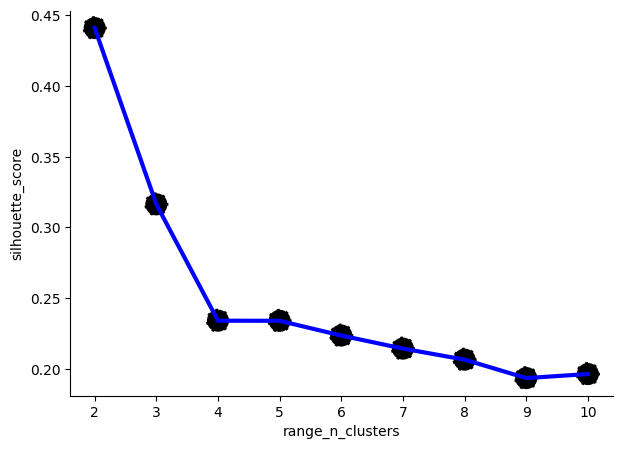

In [ ]:
#membuat model
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

#range_n_clusters = list(range(2,11)) #range cluster disini hanya bisa dimulai dari 2
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
arr_silhouette_score_euclidean = []

for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42).fit(df)
    predicted_labels = kmeans.predict(df)

    score_euclidean = silhouette_score(df, predicted_labels, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

#plot silhouette score
fig, ax = plt.subplots(figsize=(7,5))
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='blue', linewidth=3) #plot untuk garis
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='black', linestyle='--') #plot untuk titik
sns.despine()
plt.xlabel('range_n_clusters')
plt.ylabel('silhouette_score')
plt.show()

In [ ]:
clast =arr_silhouette_score_euclidean.index(max(arr_silhouette_score_euclidean)) + 3 #range clustering dengan silhouette score tertinggi ada pada 3 cluster

#membuat feature baru untuk cluster pada df
kmeans = KMeans(n_clusters=clast, random_state=42).fit(df)
clusters = kmeans.labels_
df['clusters'] = clusters #memasukan label dari clustering KMeans

In [ ]:
#membuat PCA (Principal Component Analysis)
from sklearn.decomposition import PCA #reduksi feature pada kolom DataFrame tanpa menghilangkan informasi sebelumnya

pca = PCA(n_components=3) #kolom PC yang paling banyak mengandung informasi dari data adalah PC1, dilanjut sampai ke PC-n
pca.fit(df)
pcs = pca.transform(df)
final_pca = pd.DataFrame(data = pcs, columns = ['PC1', 'PC2','PC3'])
final_pca['clusters'] = clusters #value cluster pada df dengan pca sama, karena pada dasarnya value pada 1 baris di pca menginterpretasikan data pada 1 baris di df dengan feature yang sudah di reduksi menjadi lebih sederhana
final_pca.head()

,PC1,PC2,PC3,clusters
0,9.197280,11.897886,-11.856800,1
1,-10.770495,14.434707,-7.722456,1
2,-22.830966,4.402269,5.347108,2
3,-23.032952,-15.242967,-5.471901,2
4,45.043219,-12.411350,3.277526,0


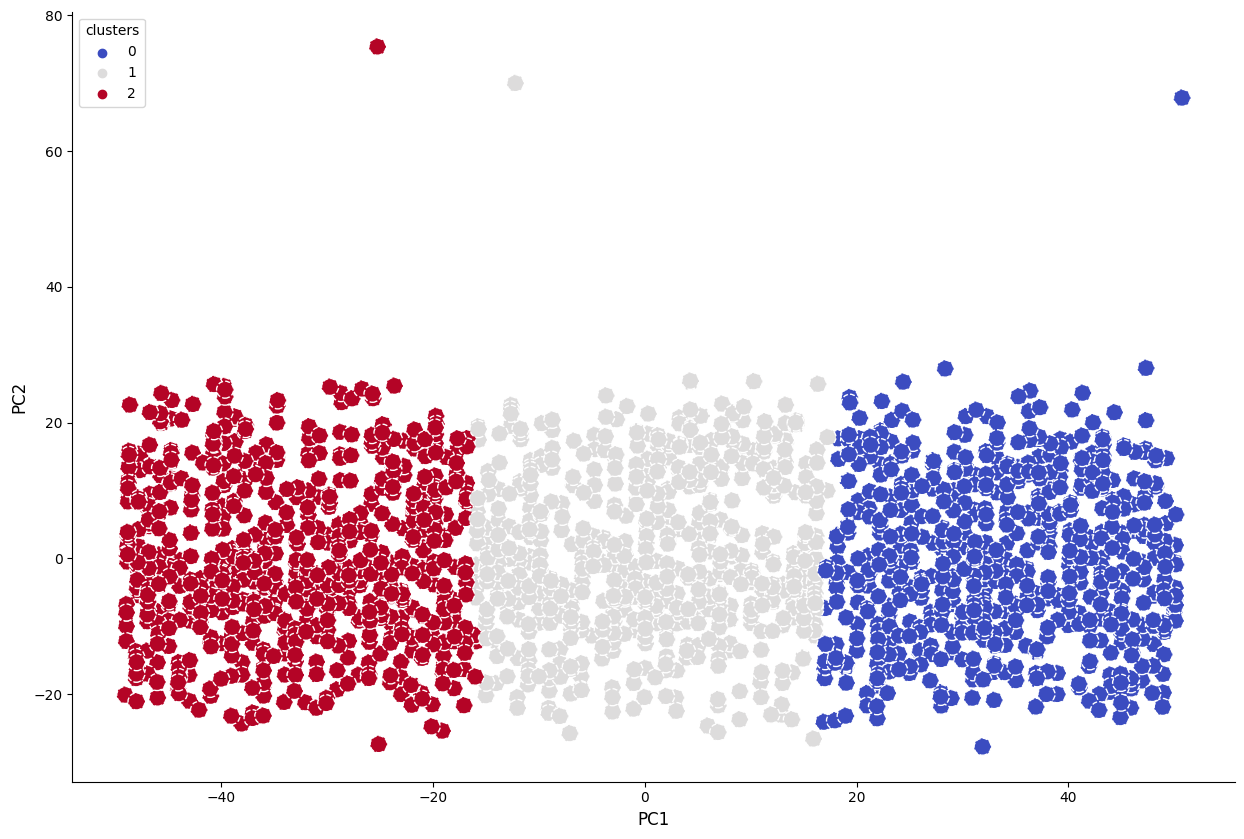

In [ ]:
#plotting 2D
fix, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data=final_pca, x='PC1', y='PC2', hue='clusters', s=150, palette='coolwarm', linestyle='--', ax=ax) #menggunakan 'PC1' dan 'PC2' karena feature ini yang paling banyak memiliki informasi dari data sebelumnya
sns.despine()
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.show()

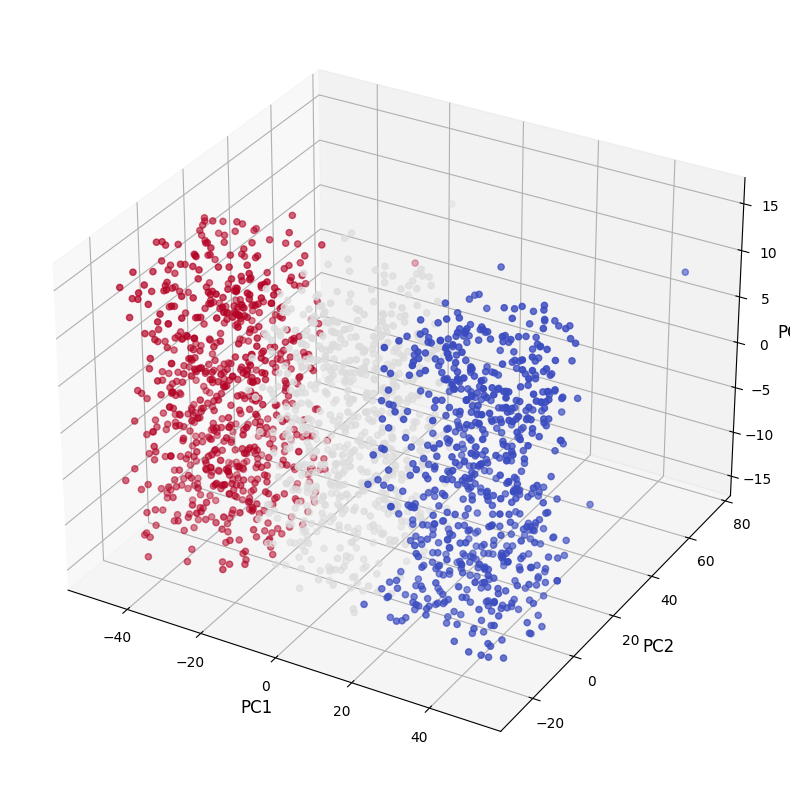

In [ ]:
#plotting 3D
from mpl_toolkits.mplot3d import Axes3D

def plot_3d(x, y, z, hue):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z, c=hue, cmap='coolwarm')

    ax.set_xlabel('PC1', fontsize=12)
    ax.set_ylabel('PC2', fontsize=12)
    ax.set_zlabel('PC3', fontsize=12)

    plt.show()

plot_3d(final_pca['PC1'], final_pca['PC2'], final_pca['PC3'], hue=final_pca['clusters'])